## Первый взгляд на данные

### Подготовка к работе и загрузка данных

In [ ]:
!gdown 1O2AVwRyr_KNLJTaBeJ7voy4uJWySodn3

Downloading...
From: https://drive.google.com/uc?id=1O2AVwRyr_KNLJTaBeJ7voy4uJWySodn3
To: /content/2_taxi_nyc.csv
100% 2.48M/2.48M [00:00<00:00, 35.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('2_taxi_nyc.csv')
df

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


### Заменим пробелы нижним подчеркиванием

In [ ]:
def underscore_rename(name):
    return name.replace(' ', '_')

df = df.rename(columns=underscore_rename)

df

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


### Информация:
- pickup_dt – интервал доставки
- pickup_month – месяц, в котором был сделан заказ
- borough - район, в котором был сделан заказ
- pickups – количество заказов за период в один час
- hday – был ли это праздник или рабочий день; Y – да, N - нет
- spd - скорость ветра, миль в час
- vsb – видимость
- temp – температура, F
- dewp – точка росы, F
- slp – атмосферное давление
- pcp_01 – количество осадков за 1 час
- pcp_06 – количество осадков за 6 часов
- pcp_24 – количество осадков за 24 часа
- sd – глубина снежного покрова

### Проверим данные на пустые значения:
Получили 10.5% пропусков в столбце borough (район заказа)

In [ ]:
round(df.isna().mean() * 100, 2)

,0
pickup_dt,0.00
pickup_month,0.00
borough,10.46
pickups,0.00
hday,0.00
spd,0.00
vsb,0.00
temp,0.00
dewp,0.00
slp,0.00


Посмотрим, как различаются между собой показатели райнов:
Сильное различие наблюдается по pickups.
Можно будет попробовать переопределить NaN значения, через схожесть показателей с некоторыми районами. Но это требует дальнейшего погружения в данные.

In [ ]:
df.groupby('borough', dropna=False).agg({'pickups': 'mean', 'spd': 'mean', 'vsb': 'mean', 'hday': 'mean'}).sort_values('pickups', ascending=False)

,pickups,spd,vsb,hday
borough,,,,
Manhattan,2387.253281,6.000039,8.820027,0.038453
Brooklyn,534.431269,6.000039,8.820027,0.038453
Queens,309.354824,6.000039,8.820027,0.038453
Bronx,50.667050,6.000039,8.820027,0.038453
NaN,2.057180,5.855493,8.801840,0.039106
Staten Island,1.601888,6.000039,8.820027,0.038453
EWR,0.024177,6.000039,8.820027,0.038453


## Погружение в данные и поиск зависимостей

### Посмотрим на количество заказов по месяцам

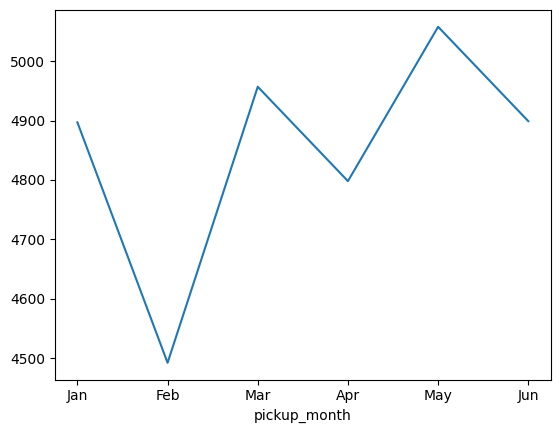

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Преобразуем колонку в категориальный тип с установленным порядком
df['pickup_month'] = pd.Categorical(df['pickup_month'], categories=month_order, ordered=True)

# Считаем количество для каждого месяца
monthly_counts = df['pickup_month'].value_counts().reindex(month_order)

# Строим бар-график
monthly_counts.plot(kind='line')
plt.show()

### Узнаем, в каких районнах в среднем в праздники больше поездок в час чем в обычные дни

In [ ]:
gr = df.groupby(['borough', 'hday'], as_index = False, dropna=False).agg({'pickups' : 'mean'})
gr.pivot(index='borough', columns='hday', values='pickups').query('Y > N')

hday,N,Y
borough,,
EWR,0.023467,0.041916
Queens,308.899904,320.730539


### Создадим столбец в котором temp будет в цельсиях вместо фаренгейта:

In [ ]:
def temp_to_celcius(temp_f):
    return ((temp_f - 32) * 5) / 9

df['temp_C'] = round(temp_to_celcius(df['temp']), 1)

Узнаем какая в среднем температура в цельсиях была в каждом месяце:

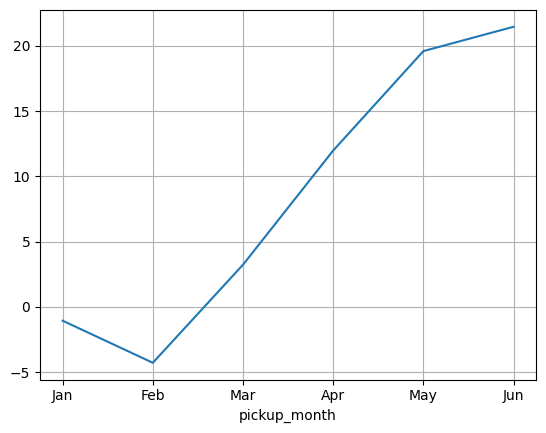

In [ ]:
# Считаем количество для каждого месяца
monthly_counts = df.groupby('pickup_month')['temp_C'].mean().reindex(month_order)

# Строим бар-график
monthly_counts.plot(kind='line', grid=True)
plt.show()